In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

## Load data

In [67]:
case_9_2_1 = pd.read_csv("../data/9_2_1_BEMS342251.csv")
case_9_2_2 = pd.read_csv("../data/9_2_2_BEMS342257.csv")
case_9_3_1 = pd.read_csv("../data/9_3_1_BEMS342289.csv")
case_9_3_2 = pd.read_csv("../data/9_3_2_BEMS342281.csv")
#case_9_15_1 = pd.read_csv("../data/9_15_1_0000388799.csv")
#case_9_15_2 = pd.read_csv("../data/9_15_2_0000388807.csv")

In [68]:
case_9_2_1.describe()

,CellID,DNA1,goat-anti-rabbit,A555,donkey-anti-mouse,DNA2,pERK,pERK-555,Rad51,DNA3,...,HER2,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
count,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,...,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000
mean,14619.500000,17664.405570,10561.187623,1225.674948,4093.192265,8702.062041,5694.704596,2497.966409,8984.275683,18871.137292,...,2800.515027,6768.367366,4370.118159,165.301081,17.382326,12.148169,0.668835,0.900797,0.653867,-0.040170
std,8440.427922,8572.384437,4158.950824,228.400579,1314.367847,4379.436705,2275.554845,1053.594042,3377.010025,9458.824804,...,519.441305,2444.255666,1853.597406,91.299864,4.871754,2.964448,0.152157,0.043369,0.076218,0.866487
min,1.000000,21.055556,1108.331507,576.947368,1267.060000,60.223256,826.613636,332.647059,699.058824,784.140940,...,2539.540541,385.349776,236.308612,8.000000,5.716626,1.732051,0.000000,0.608696,0.323810,-1.570796
25%,7310.250000,11562.556487,8122.566169,1050.090296,3381.854969,5685.877384,4312.710479,1857.130369,7027.186974,12058.434786,...,2604.009623,5079.171335,2613.427417,115.000000,14.453929,10.260659,0.573276,0.883721,0.606630,-0.753681
50%,14619.500000,16872.139652,9743.765136,1269.101844,3966.944055,8184.753236,5348.827530,2324.765771,8597.736589,17655.431599,...,2643.982162,6918.390081,4174.527974,148.000000,16.596701,11.817370,0.689054,0.911504,0.660287,-0.079143
75%,21928.750000,22595.651677,11823.252498,1392.057143,4564.142010,10996.777844,6580.230614,2923.331774,10487.632867,24065.297814,...,2714.193307,8565.266305,5906.600256,193.000000,19.326920,13.661738,0.785000,0.929412,0.707692,0.669276
max,29238.000000,65396.163636,58219.585106,2635.962025,51188.067039,41459.325581,37879.930233,18051.860465,48798.820000,65439.290909,...,38836.016260,13495.104110,8876.256637,2987.000000,122.012493,49.786997,0.993844,1.000000,0.988924,1.570796


In [69]:
case_9_2_2.describe()

,CellID,DNA1,goat-anti-rabbit,A555,donkey-anti-mouse,DNA2,pERK,pERK-555,Rad51,DNA3,...,HER2,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
count,41669.00000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,...,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000,41669.000000
mean,20835.00000,16377.157678,9289.875385,1249.470662,3489.963167,8527.186014,7157.481160,3391.670113,12233.243803,17329.897303,...,2856.566976,5670.732805,9234.974541,177.513331,18.194611,12.447181,0.683338,0.894967,0.644953,-0.027127
std,12028.94852,9485.698672,3858.687145,399.435106,1129.176002,5065.952562,4766.046432,2706.580650,5400.682778,9397.352458,...,602.102652,3393.707901,4242.125054,94.112257,4.992202,3.317843,0.151541,0.046609,0.079169,0.906338
min,1.00000,21.375850,1248.723837,381.174757,1361.260563,75.705357,961.206166,379.823529,765.098592,483.187845,...,2507.003448,94.553191,43.859551,13.000000,5.659439,1.745073,0.000000,0.601266,0.259259,-1.570796
25%,10418.00000,9501.623116,7400.729508,838.143678,2894.500000,5084.703704,4674.424528,2053.758621,9078.781818,10456.480769,...,2588.477912,2381.181818,4952.208696,115.000000,14.621335,10.240062,0.590368,0.874598,0.593985,-0.802496
50%,20835.00000,15157.880000,8907.373832,1328.910714,3419.068182,7601.014085,5823.000000,2637.175000,11790.205202,15696.333333,...,2620.109195,5110.072727,10450.447674,156.000000,17.348824,12.060742,0.706609,0.906383,0.650350,-0.065799
75%,31252.00000,22017.472868,10456.263736,1573.470588,3911.523438,11009.590164,8035.007117,3753.663462,14774.083333,22353.009524,...,2752.391566,9120.385593,13136.706422,217.000000,20.880450,14.223516,0.798072,0.927374,0.701587,0.758813
max,41669.00000,63539.650794,57126.973180,5114.571429,24739.833333,60469.755102,62564.345865,53675.360902,58693.045455,65523.047619,...,36489.851724,12373.883194,15365.773663,1469.000000,55.053093,37.586989,0.985429,1.000000,0.920635,1.570796


In [70]:
case_9_3_1.describe()

,CellID,DNA1,goat-anti-rabbit,A555,donkey-anti-mouse,DNA2,pERK,pERK-555,Rad51,DNA3,...,HER2,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
count,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,...,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000,49422.000000
mean,24711.500000,14248.639478,7087.712872,578.290955,3192.351354,6101.440541,4714.045630,2053.418941,8074.507598,13708.860359,...,2783.791982,6631.650608,6728.866027,177.919246,18.206068,12.596011,0.678480,0.899286,0.650589,-0.024567
std,14267.046839,6679.878369,2442.051813,118.299957,809.880781,2531.011624,1736.137106,750.685106,2857.340677,6533.788350,...,460.953718,3096.102326,2369.902992,76.387501,4.402008,2.894009,0.147426,0.042299,0.074925,0.879083
min,1.000000,30.329268,617.031621,189.948617,1240.162055,124.632911,603.114625,252.272152,408.259494,954.576613,...,1836.491007,504.785124,16.550360,16.000000,6.277606,3.087750,0.000000,0.586207,0.306548,-1.570796
25%,12356.250000,9657.574000,5562.356394,493.152567,2660.326436,4403.305094,3597.007159,1592.310458,6141.321861,9248.038218,...,2556.831734,4221.823061,4655.516162,123.000000,15.044942,10.613172,0.587601,0.881119,0.602941,-0.760752
50%,24711.500000,13062.306556,6682.234554,567.626409,3189.935616,5736.028339,4425.467687,1917.836875,7960.664639,12501.640658,...,2602.782439,6681.363341,6834.588512,164.000000,17.662742,12.355688,0.699659,0.909091,0.656140,-0.046857
75%,37066.750000,17457.178696,8187.153077,655.010179,3632.738000,7360.519361,5440.100776,2348.900482,9734.017635,16744.656490,...,2764.003577,9129.659531,8906.897702,218.000000,20.713997,14.344937,0.789917,0.927928,0.703333,0.707992
max,49422.000000,64044.376344,57586.582278,3592.826633,33569.004219,30430.666667,28148.917808,13183.693717,37155.652174,63037.511364,...,30593.677249,13472.416058,11267.573123,1011.000000,48.712778,30.320200,0.973609,1.000000,0.920000,1.570796


In [71]:
case_9_3_2.describe()

,CellID,DNA1,goat-anti-rabbit,A555,donkey-anti-mouse,DNA2,pERK,pERK-555,Rad51,DNA3,...,HER2,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
count,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,...,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000,19739.000000
mean,9870.000000,13147.196670,11541.377400,1787.066424,3562.121103,4084.237133,5443.739874,2646.464331,6054.888420,11554.636424,...,2638.197417,5983.956507,4630.833203,184.633112,17.941988,13.190774,0.626927,0.910308,0.674418,-0.024028
std,5698.302818,6434.838001,3528.993670,412.031150,1422.982243,1633.142597,1749.003720,832.400658,1954.665899,6100.896307,...,381.466025,2842.822685,1665.788548,70.099018,3.885035,2.794564,0.167514,0.036850,0.072276,0.889006
min,1.000000,25.684015,1254.834783,843.805195,1386.782609,77.000000,987.980583,681.938356,775.104348,801.887500,...,2488.470046,747.465753,380.589286,29.000000,7.872105,4.659174,0.000000,0.619835,0.340659,-1.570796
25%,4935.500000,8647.912134,9314.827714,1600.100627,2975.930361,3005.653559,4366.347252,2141.359192,4852.835845,7322.754125,...,2550.380753,3251.812682,3285.538961,133.000000,15.218696,11.236612,0.516542,0.896226,0.628959,-0.775318
50%,9870.000000,12007.275591,11078.872038,1747.426540,3447.817427,3832.961832,5226.674825,2533.956522,5831.088050,10322.610487,...,2558.224359,5390.237288,4073.197628,176.000000,17.554145,12.989922,0.650409,0.919431,0.681319,-0.046837
75%,14804.500000,16223.500088,13179.542692,1897.128868,3988.089569,4862.431264,6211.823376,2994.211954,6941.601543,14262.684479,...,2585.274062,8409.851408,5670.745091,226.000000,19.961602,15.047662,0.755726,0.934673,0.725962,0.722743
max,19739.000000,59793.354839,46473.025253,10256.679688,64872.767123,18225.943548,37791.415385,19281.684615,41750.429224,62303.395161,...,30358.652968,13562.821918,10155.582192,831.000000,44.200696,28.800918,0.975150,0.986486,0.920635,1.570796


In [72]:
features_of_interest = pd.read_csv(f"data/9_2_1/features_to_impute.csv")
features_of_interest = features_of_interest["0"].to_list()
features_of_interest

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

In [100]:
features_9_2_1 = case_9_2_1[features_of_interest]
mean_9_2_1 = pd.DataFrame(features_9_2_1.median(axis=0))
mean_9_2_1.reset_index(inplace=True)
mean_9_2_1.rename(columns={0: "Median", "index": "Feature"}, inplace=True)
mean_9_2_1["Case"] = "9 2 1"
mean_9_2_1["Mean"] = features_9_2_1.mean().values
mean_9_2_1["Std"] = features_9_2_1.std().values


In [101]:
features_9_2_2 = case_9_2_2[features_of_interest]
mean_9_2_2 = pd.DataFrame(features_9_2_2.median(axis=0))
mean_9_2_2.reset_index(inplace=True)
mean_9_2_2.rename(columns={0: "Median", "index": "Feature"}, inplace=True)
mean_9_2_2["Case"] = "9 2 2"
mean_9_2_2["Mean"] = features_9_2_2.mean().values
mean_9_2_2["Std"] = features_9_2_2.std().values

In [102]:
features_9_3_1 = case_9_3_1[features_of_interest]
mean_9_3_1 = pd.DataFrame(features_9_3_1.median(axis=0))
mean_9_3_1.reset_index(inplace=True)
mean_9_3_1.rename(columns={0: "Median", "index": "Feature"}, inplace=True)
mean_9_3_1["Case"] = "9 3 1"
mean_9_3_1["Mean"] = features_9_3_1.mean().values
mean_9_3_1["Std"] = features_9_3_1.std().values

In [103]:
features_9_3_2 = case_9_3_2[features_of_interest]
mean_9_3_2 = pd.DataFrame(features_9_3_2.median(axis=0))
mean_9_3_2.reset_index(inplace=True)
mean_9_3_2.rename(columns={0: "Median", "index": "Feature"}, inplace=True)
mean_9_3_2["Case"] = "9 3 2"
mean_9_3_2["Mean"] = features_9_3_2.mean().values
mean_9_3_2["Std"] = features_9_3_2.std().values

In [104]:
#features_9_15_1 = case_9_15_1[features_of_interest]
#mean_9_15_1 = pd.DataFrame(features_9_15_1.median(axis=0))
#mean_9_15_1.reset_index(inplace=True)
#mean_9_15_1.rename(columns={0: "Intensity", "index": "Feature"}, inplace=True)
#mean_9_15_1["Case"] = "9 15 1"

In [105]:
#features_9_15_2 = case_9_15_2[features_of_interest]
#mean_9_15_2 = pd.DataFrame(features_9_15_2.median(axis=0))
#mean_9_15_2.reset_index(inplace=True)
#mean_9_15_2.rename(columns={0: "Intensity", "index": "Feature"}, inplace=True)
#mean_9_15_2["Case"] = "9 15 2"

In [106]:
combined_mean = pd.concat([mean_9_2_1,mean_9_2_2,mean_9_3_1,mean_9_3_2])

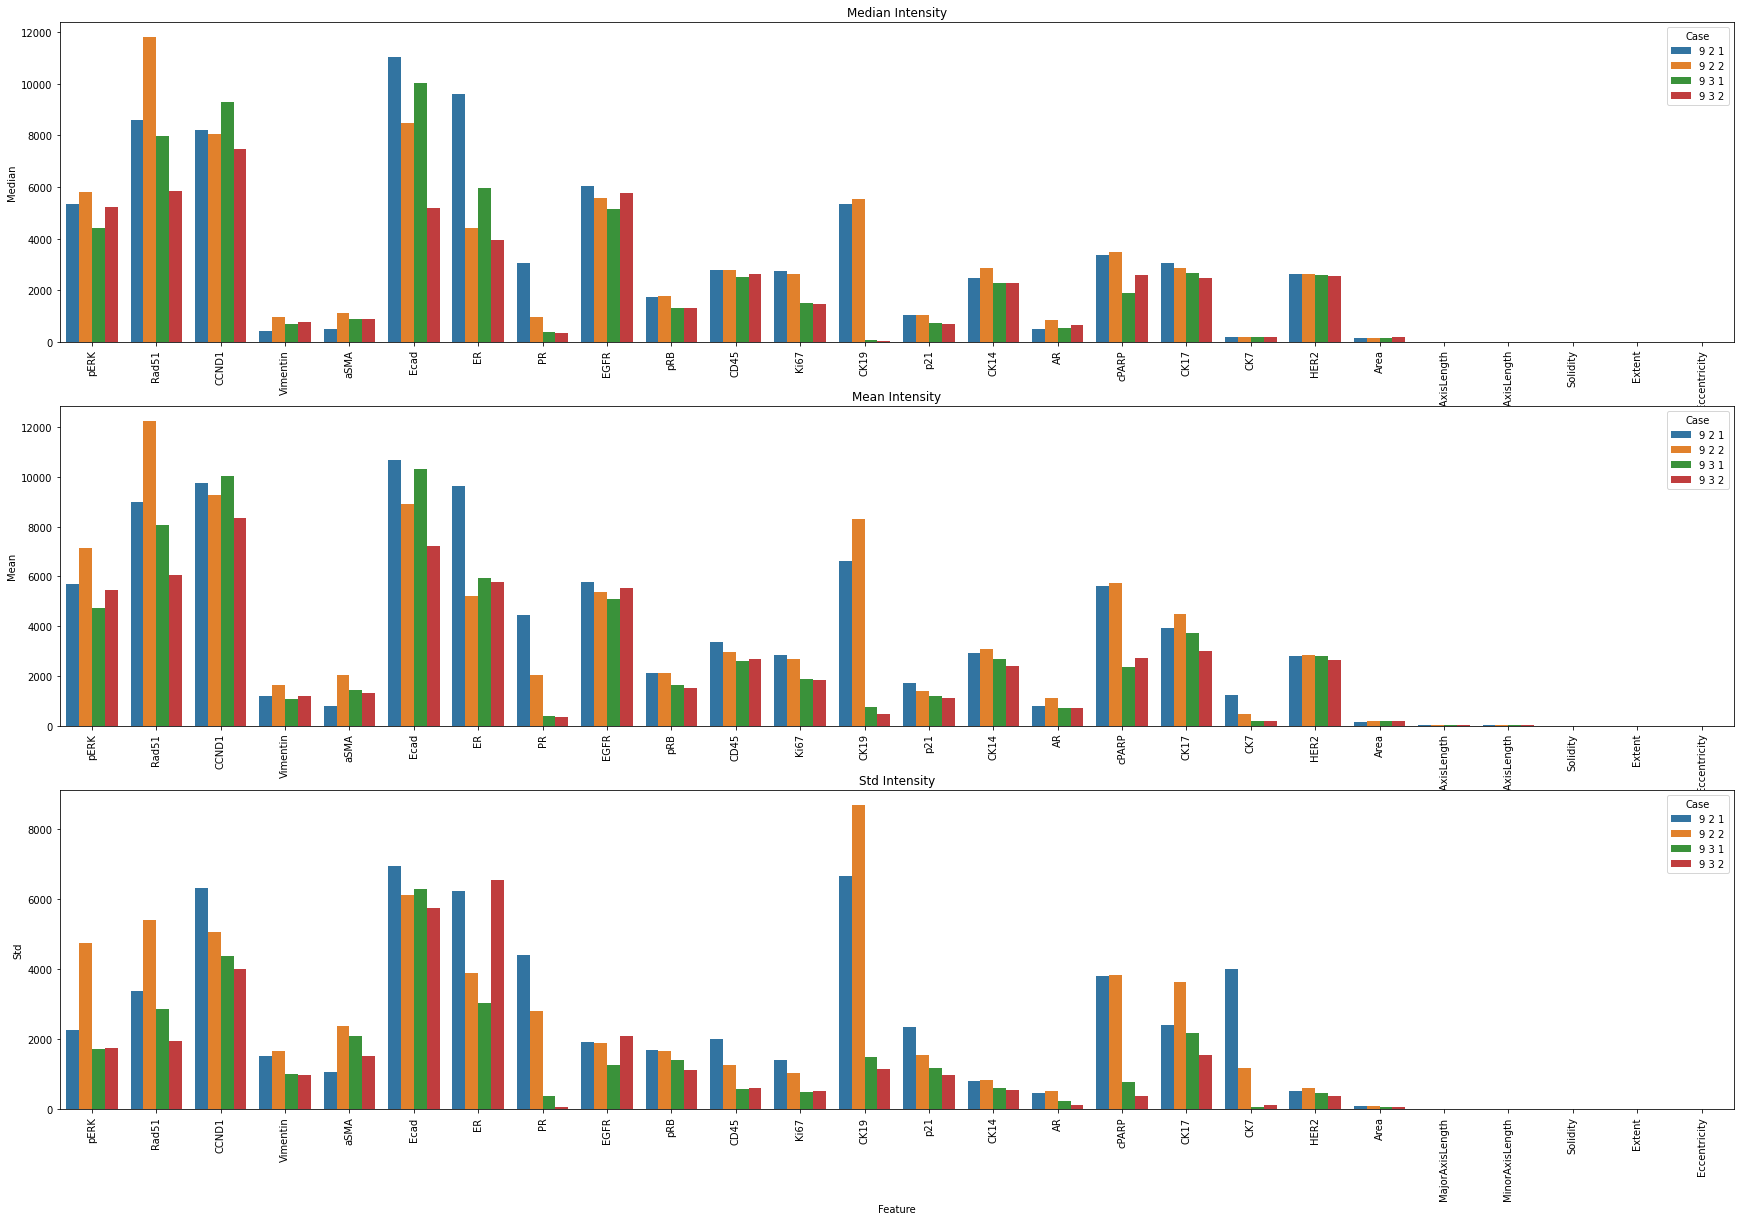

In [183]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,20))
sns.barplot(x="Feature", y="Median", hue="Case", data=combined_mean, ax=ax1)
sns.barplot(x="Feature", y="Mean", hue="Case", data=combined_mean, ax=ax2)
sns.barplot(x="Feature", y="Std", hue="Case", data=combined_mean, ax=ax3)

ax1.set_title("Median Intensity")
ax2.set_title("Mean Intensity")
ax3.set_title("Std Intensity")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
        
plt.savefig(f'data/intensity_expression.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

In [184]:
marker_of_interest = "CK19"

In [185]:
combined_mean[combined_mean["Feature"] == marker_of_interest]

,Feature,Median,Case,Mean,Std
12,CK19,5335.532543,9 2 1,6597.751340,6659.910143
12,CK19,5538.062069,9 2 2,8305.685354,8696.448033
12,CK19,80.328350,9 3 1,771.168463,1488.459499
12,CK19,56.290076,9 3 2,472.551067,1165.697207


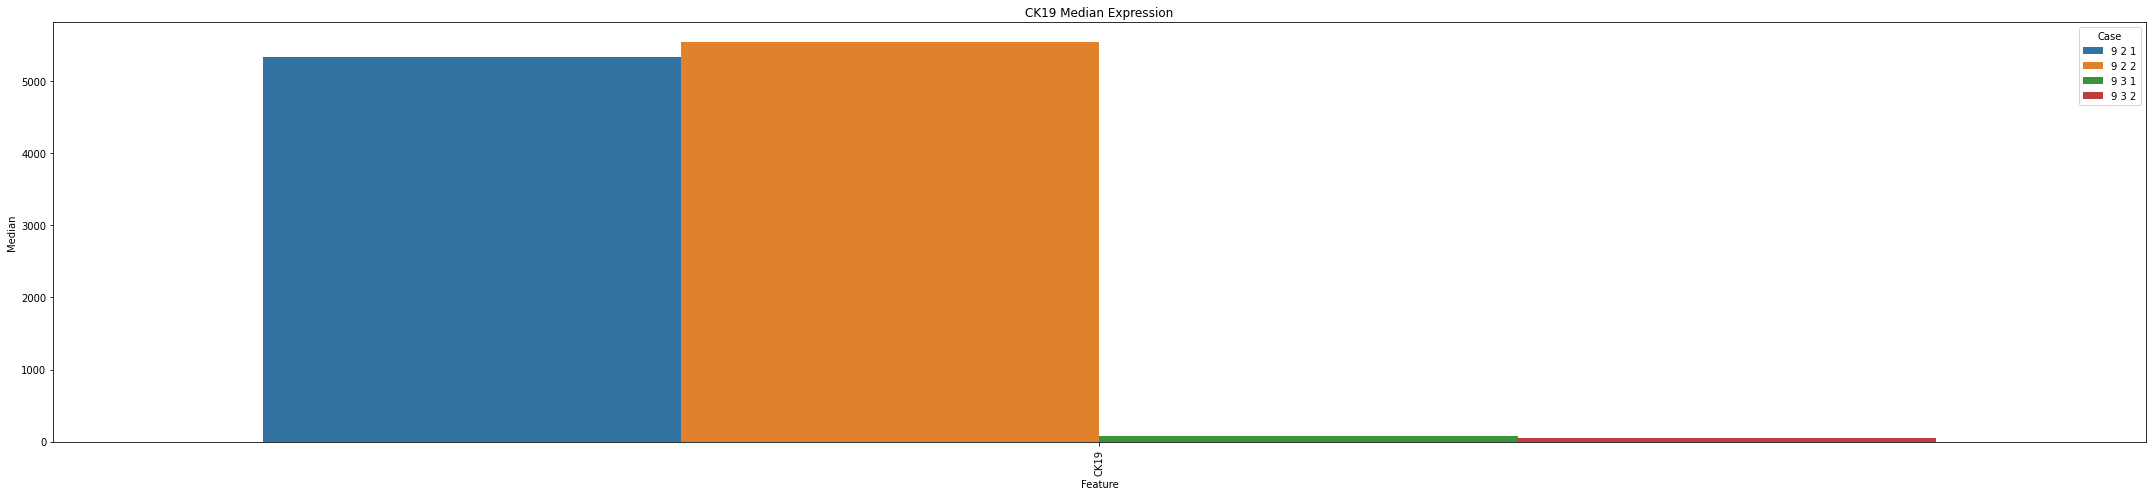

In [189]:
fig = plt.figure(figsize=(30,7))
sns.barplot(x="Feature", y="Median", hue="Case", data=combined_mean[combined_mean["Feature"] == marker_of_interest])

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
plt.title(f"{marker_of_interest} Median Expression")
        
fig.tight_layout()
plt.savefig(f'data/{marker_of_interest}_intensity_expression.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

## Correlation

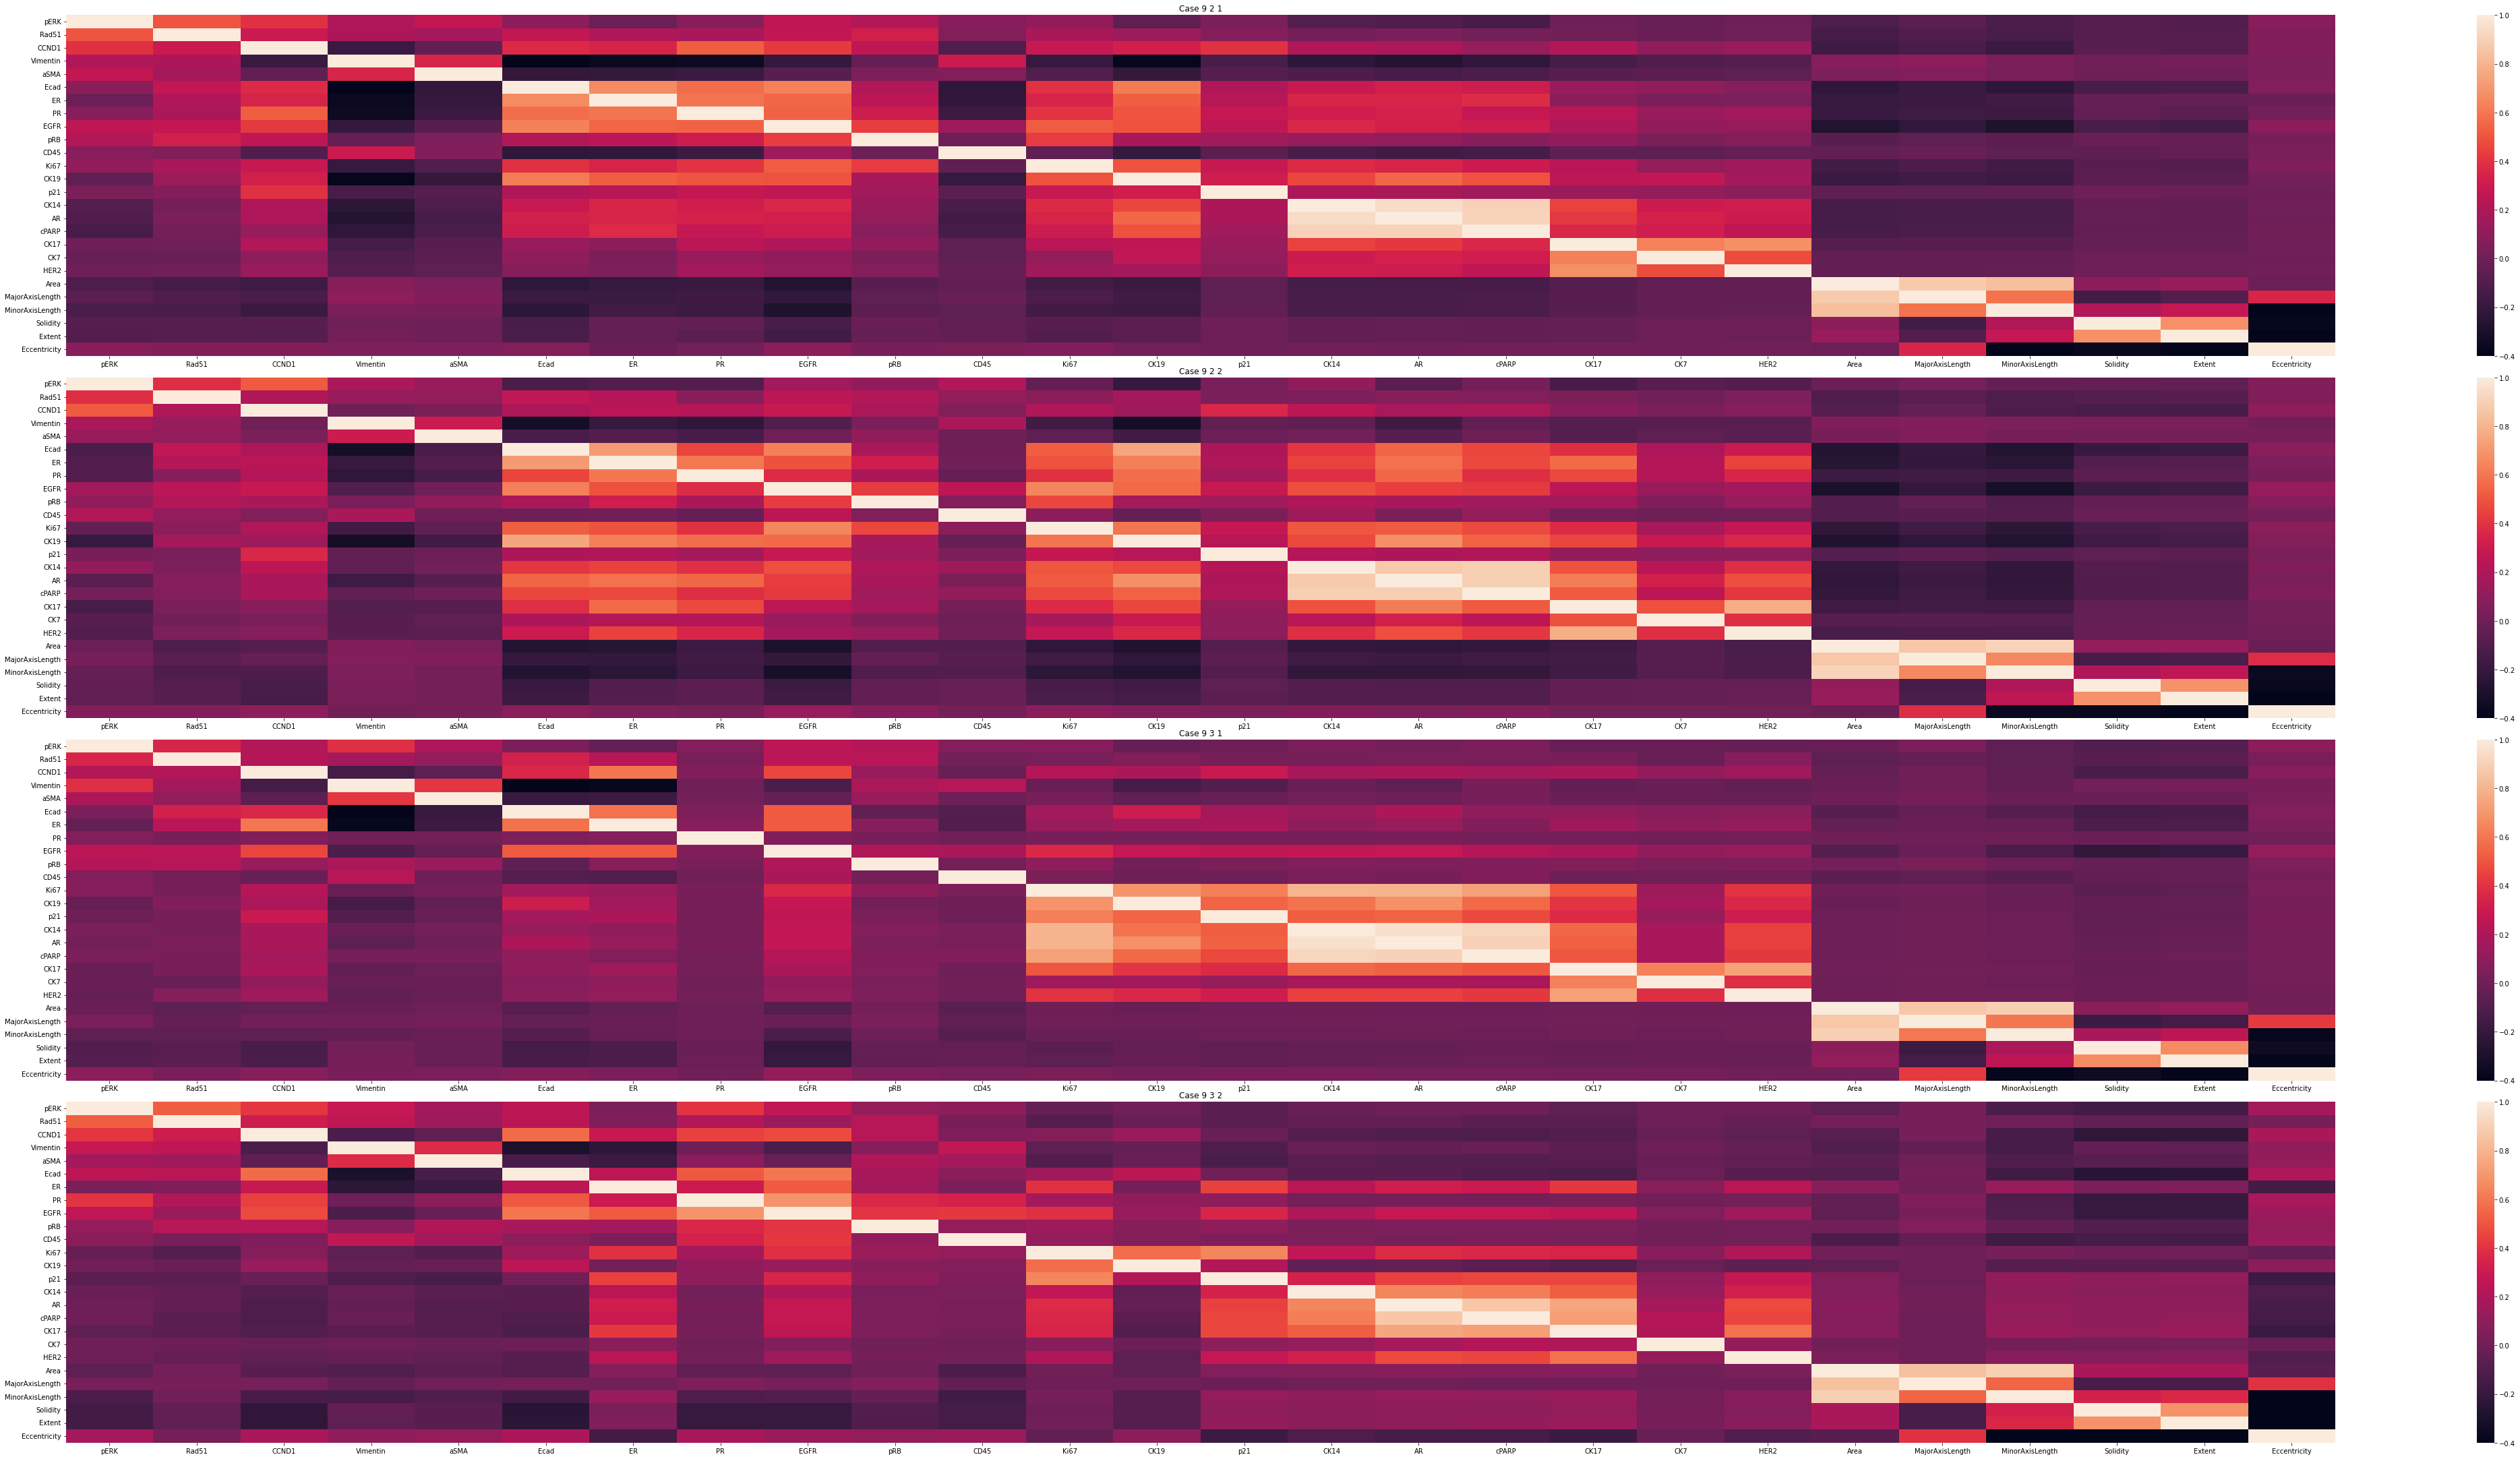

In [191]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1, figsize=(60,30))
sns.heatmap(features_9_2_1.corr(), ax=ax1, vmin = -0.4)
sns.heatmap(features_9_2_2.corr(), ax=ax2, vmin = -0.4)
sns.heatmap(features_9_3_1.corr(), ax=ax3, vmin = -0.4)
sns.heatmap(features_9_3_2.corr(), ax=ax4, vmin = -0.4)
plt.tight_layout()

ax1.set_title("Case 9 2 1")
ax2.set_title("Case 9 2 2")
ax3.set_title("Case 9 3 1")
ax4.set_title("Case 9 3 2")

plt.savefig(f'data/case_correlation.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

In [180]:
markers_of_interest = ["CK7", "CK19", "HER2", "AR", "PR"]

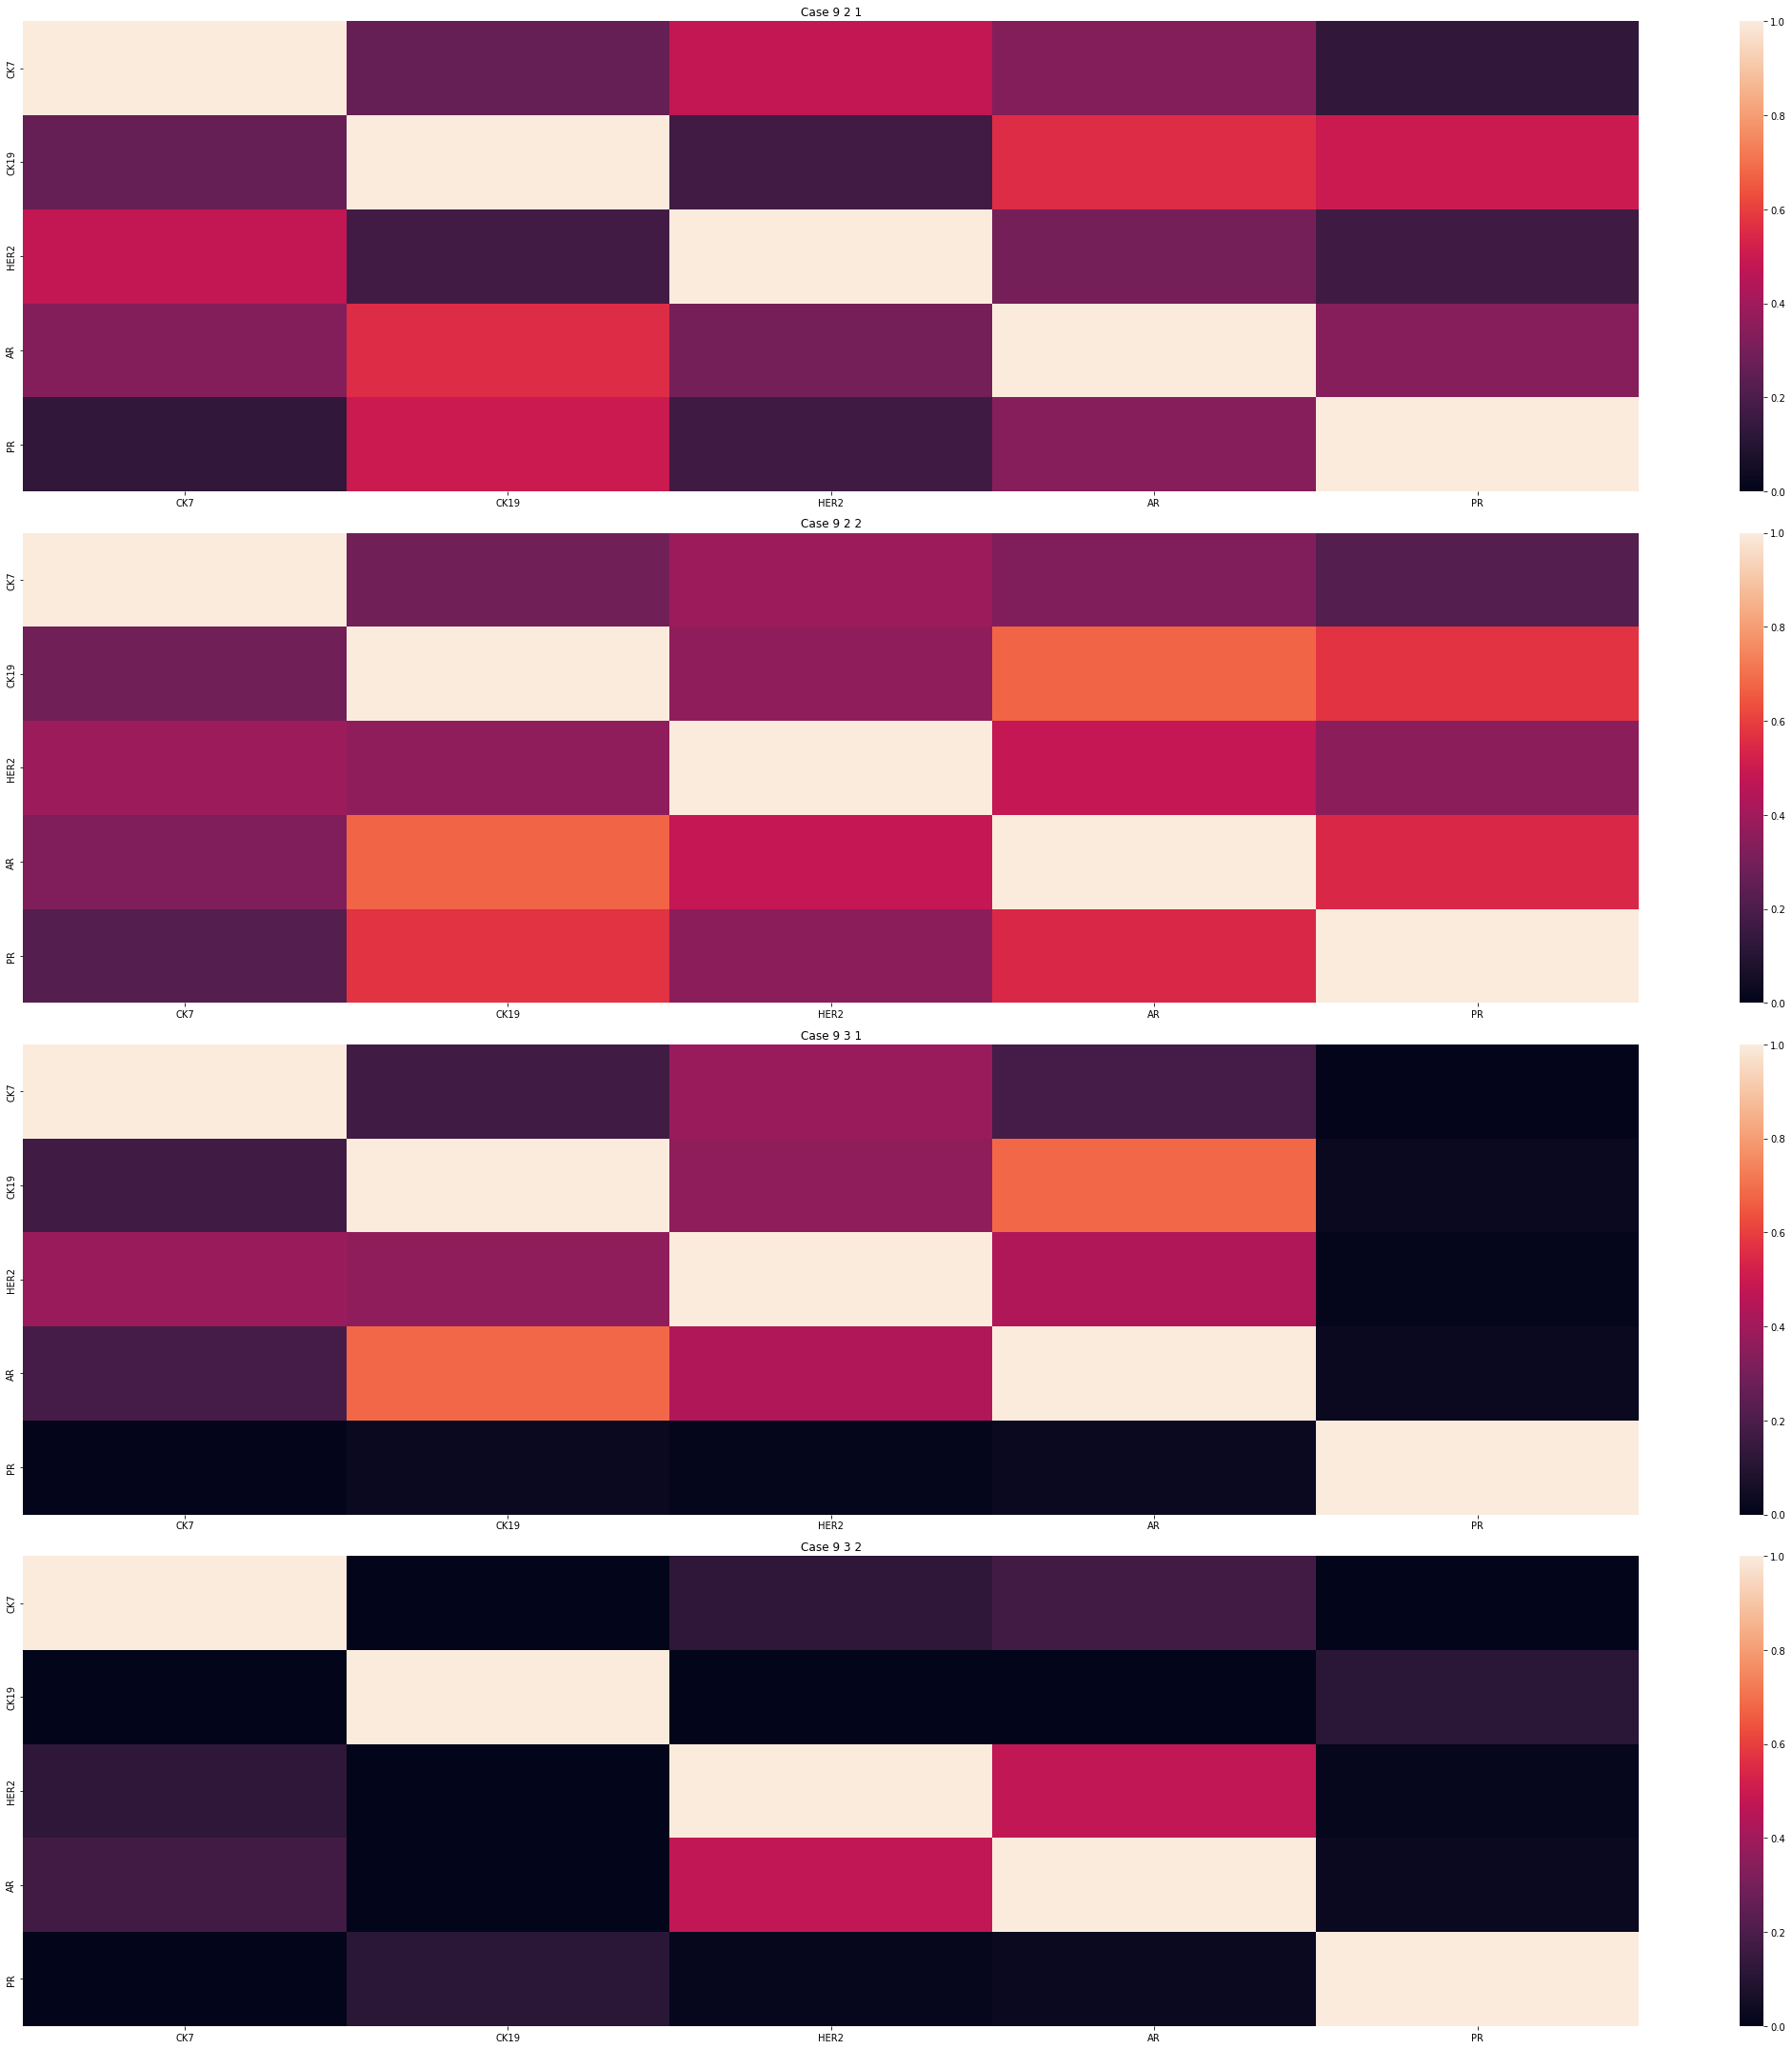

In [181]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1, figsize=(30,30))
sns.heatmap(features_9_2_1[markers_of_interest].corr(), ax=ax1, vmin = 0)
sns.heatmap(features_9_2_2[markers_of_interest].corr(), ax=ax2, vmin = 0)
sns.heatmap(features_9_3_1[markers_of_interest].corr(), ax=ax3, vmin = 0)
sns.heatmap(features_9_3_2[markers_of_interest].corr(), ax=ax4, vmin = 0)

ax1.set_title("Case 9 2 1")
ax2.set_title("Case 9 2 2")
ax3.set_title("Case 9 3 1")
ax4.set_title("Case 9 3 2")

plt.tight_layout()

plt.savefig(f'data/case_correlation_specific.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')

# Phenotypes

In [170]:
case_9_2_1_ph = pd.read_csv("../phenotypes/9_2_1_BEMS342251_phenotypes.csv")
case_9_2_1_ph["Case"] = "9 2 1" 

case_9_2_2_ph = pd.read_csv("../phenotypes/9_2_2_BEMS342257_phenotypes.csv")
case_9_2_2_ph["Case"] = "9 2 2" 

case_9_3_1_ph = pd.read_csv("../phenotypes/9_3_1_BEMS342289_phenotypes.csv")
case_9_3_1_ph["Case"] = "9 3 1" 

case_9_3_2_ph = pd.read_csv("../phenotypes/9_3_2_BEMS342281_phenotypes.csv")
case_9_3_2_ph["Case"] = "9 3 2" 

,imageid,phenotype,Case
0,BEMS342251,Basal,9 2 1
1,BEMS342251,Basal,9 2 1
2,BEMS342251,Basal,9 2 1
3,BEMS342251,Basal,9 2 1
4,BEMS342251,Basal,9 2 1
...,...,...,...
29233,BEMS342251,Basal,9 2 1
29234,BEMS342251,Basal,9 2 1
29235,BEMS342251,Basal,9 2 1
29236,BEMS342251,Basal,9 2 1


In [190]:
#case_9_2_1_ph_counts = pd.DataFrame(case_9_2_1_ph.value_counts())
#case_9_2_1_ph_counts.reset_index(inplace=True)
#case_9_2_1_ph_counts
combined_phenotypes = pd.concat([pd.DataFrame(case_9_2_1_ph.value_counts()),pd.DataFrame(case_9_2_2_ph.value_counts()),pd.DataFrame(case_9_3_1_ph.value_counts()),pd.DataFrame(case_9_3_2_ph.value_counts())])
combined_phenotypes.reset_index(inplace=True)
combined_phenotypes.rename(columns={0: "Count"}, inplace=True)


<AxesSubplot:xlabel='phenotype', ylabel='Count'>

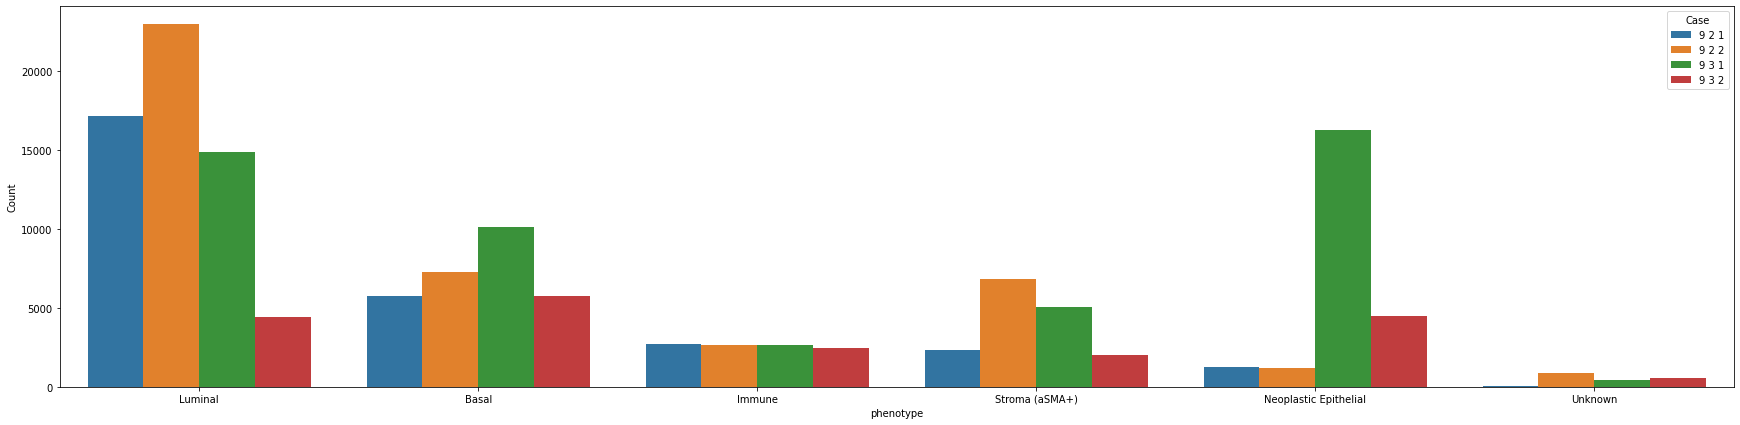

In [163]:
fig = plt.figure(figsize=(30,7))
sns.barplot(x="phenotype", y="Count", hue="Case", data=combined_phenotypes)

# Scanpy heatmap

In [178]:
case_9_2_1["Phentype"] = case_9_2_1_ph["phenotype"].values

adata = ad.AnnData(case_9_2_1)
markers = ['CK19', "CK7", "CK14", "CK17"]
sc.pl.heatmap(adata, markers, groupby='Phentype', swap_axes=True)

ValueError: could not convert string to float: 'Basal'